In [1]:
import os
import pandas as pd
import re
import datetime as dt
import numpy as np
from IPython.display import display
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, accuracy_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn import metrics as mt
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

In [2]:
# load data
#df = pd.read_csv('all_train.csv') # read in the csv file

df = pd.read_csv('/Users/ravis/Downloads/data/all_train.csv')

In [3]:
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [5]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


##### Missing value analysis

In [6]:
# Validate null values in the csv file
df.isnull().sum().sum()

0

#### Target

In [7]:
df['# label'].value_counts()

1.0    3500879
0.0    3499121
Name: # label, dtype: int64

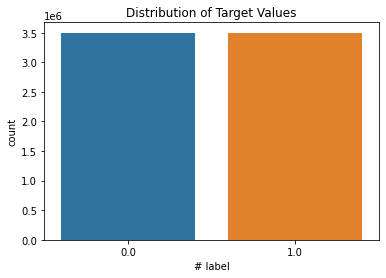

In [8]:
sns.countplot(x = "# label", data = df)
plt.title("Distribution of Target Values")
plt.show()

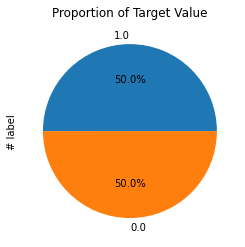

In [9]:
# Pie chart
df['# label'].value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

##### Independent Variable analysis

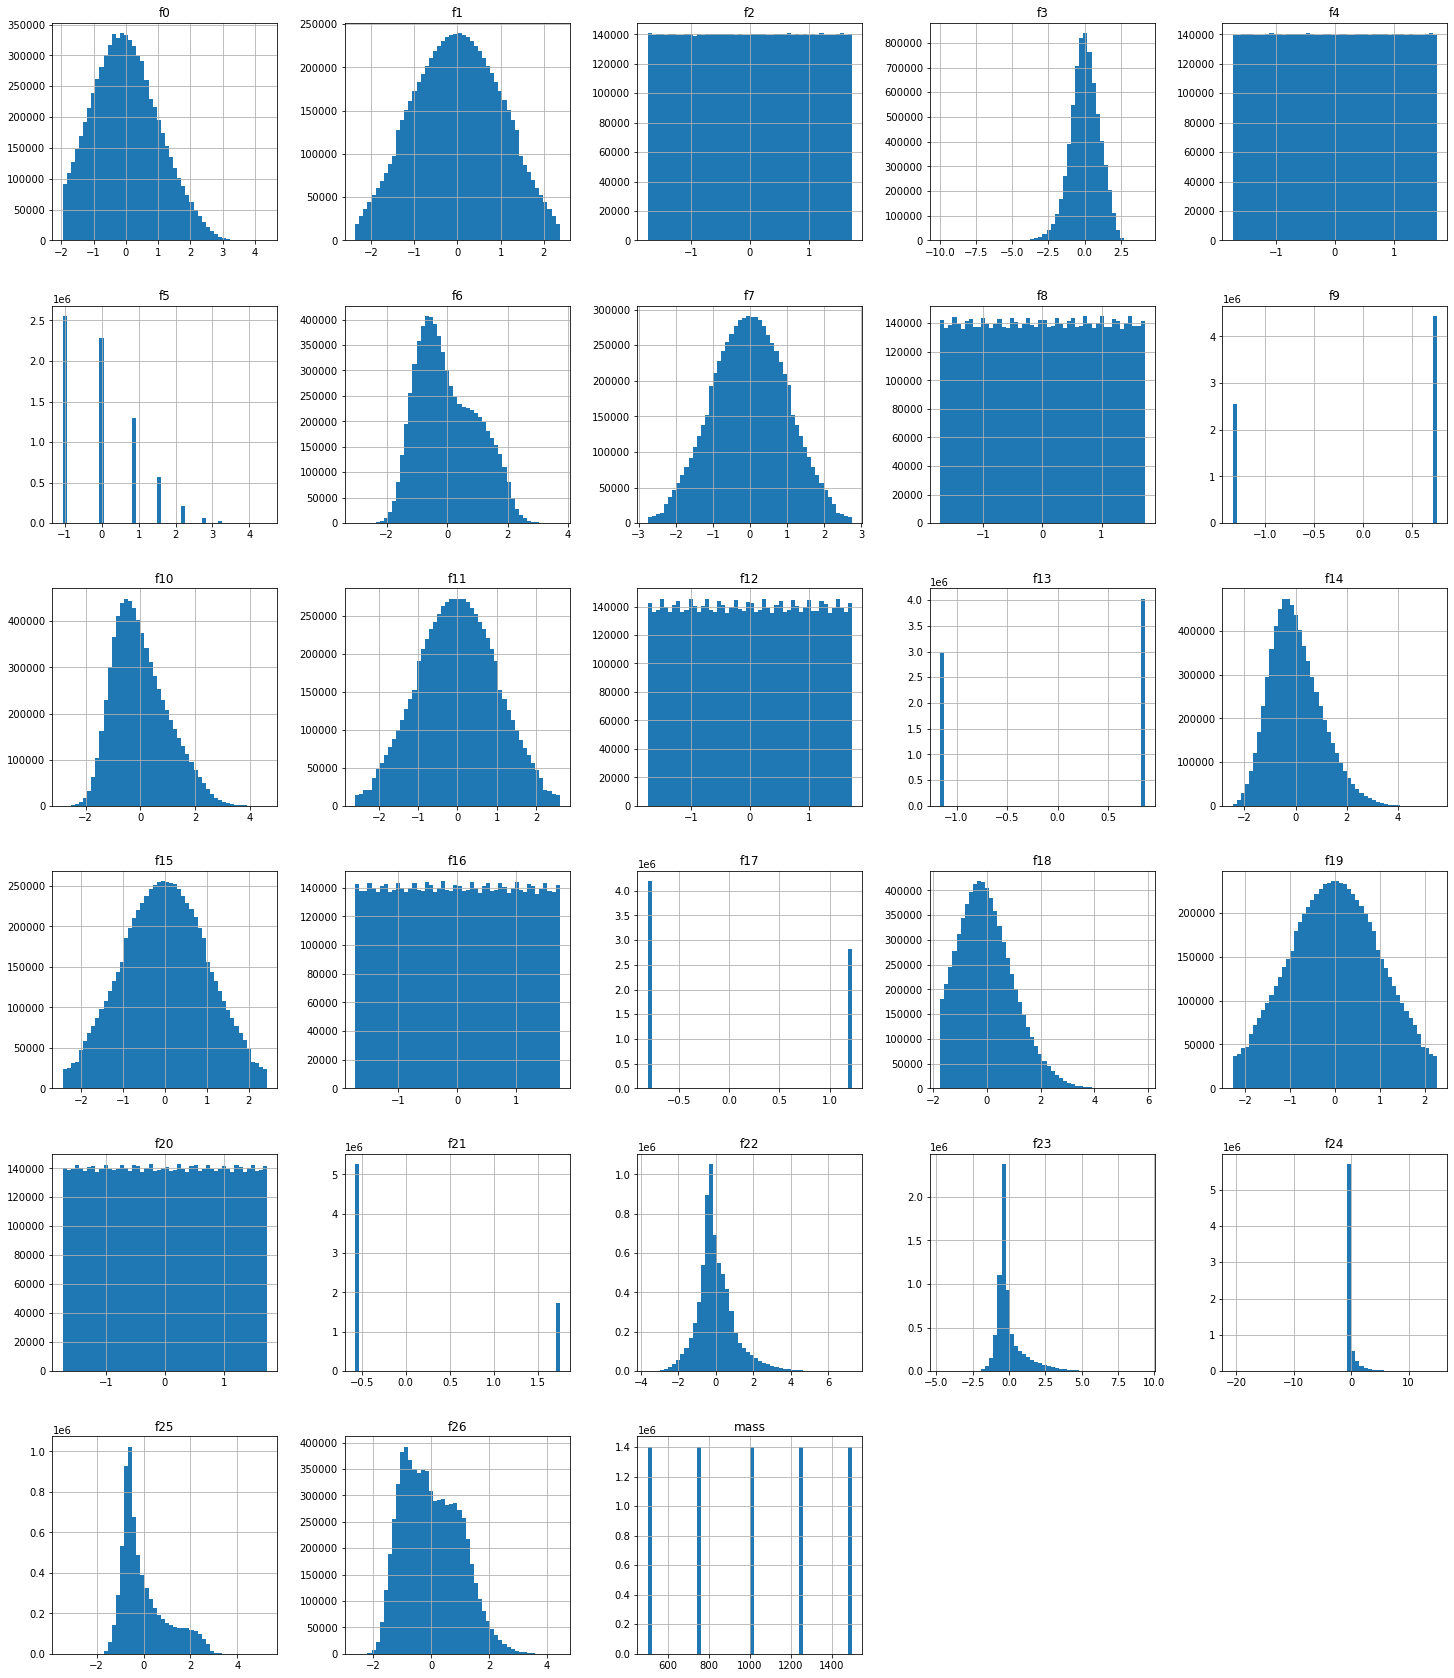

In [10]:
#Visualizing the hist of data to check normality of independent variable
df_X = df.drop(['# label'],axis=1)
df_X.hist(bins=50,figsize=(25,30))
plt.show()

In [11]:
print(df['f9'].value_counts())
print(df['f13'].value_counts()) 
print(df['f17'].value_counts()) 
print(df['f21'].value_counts())

 0.754261    4438579
-1.325801    2561421
Name: f9, dtype: int64
 0.860649    4027351
-1.161915    2972649
Name: f13, dtype: int64
-0.815440    4187343
 1.226331    2812657
Name: f17, dtype: int64
-0.573682    5265796
 1.743123    1734204
Name: f21, dtype: int64


In [12]:
df.drop(['# label'],axis=1).describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,-6.869956e-03,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,1.001938e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,-1.325801e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,-1.325801e+00,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,7.542607e-01,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,7.542607e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,7.542607e-01,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


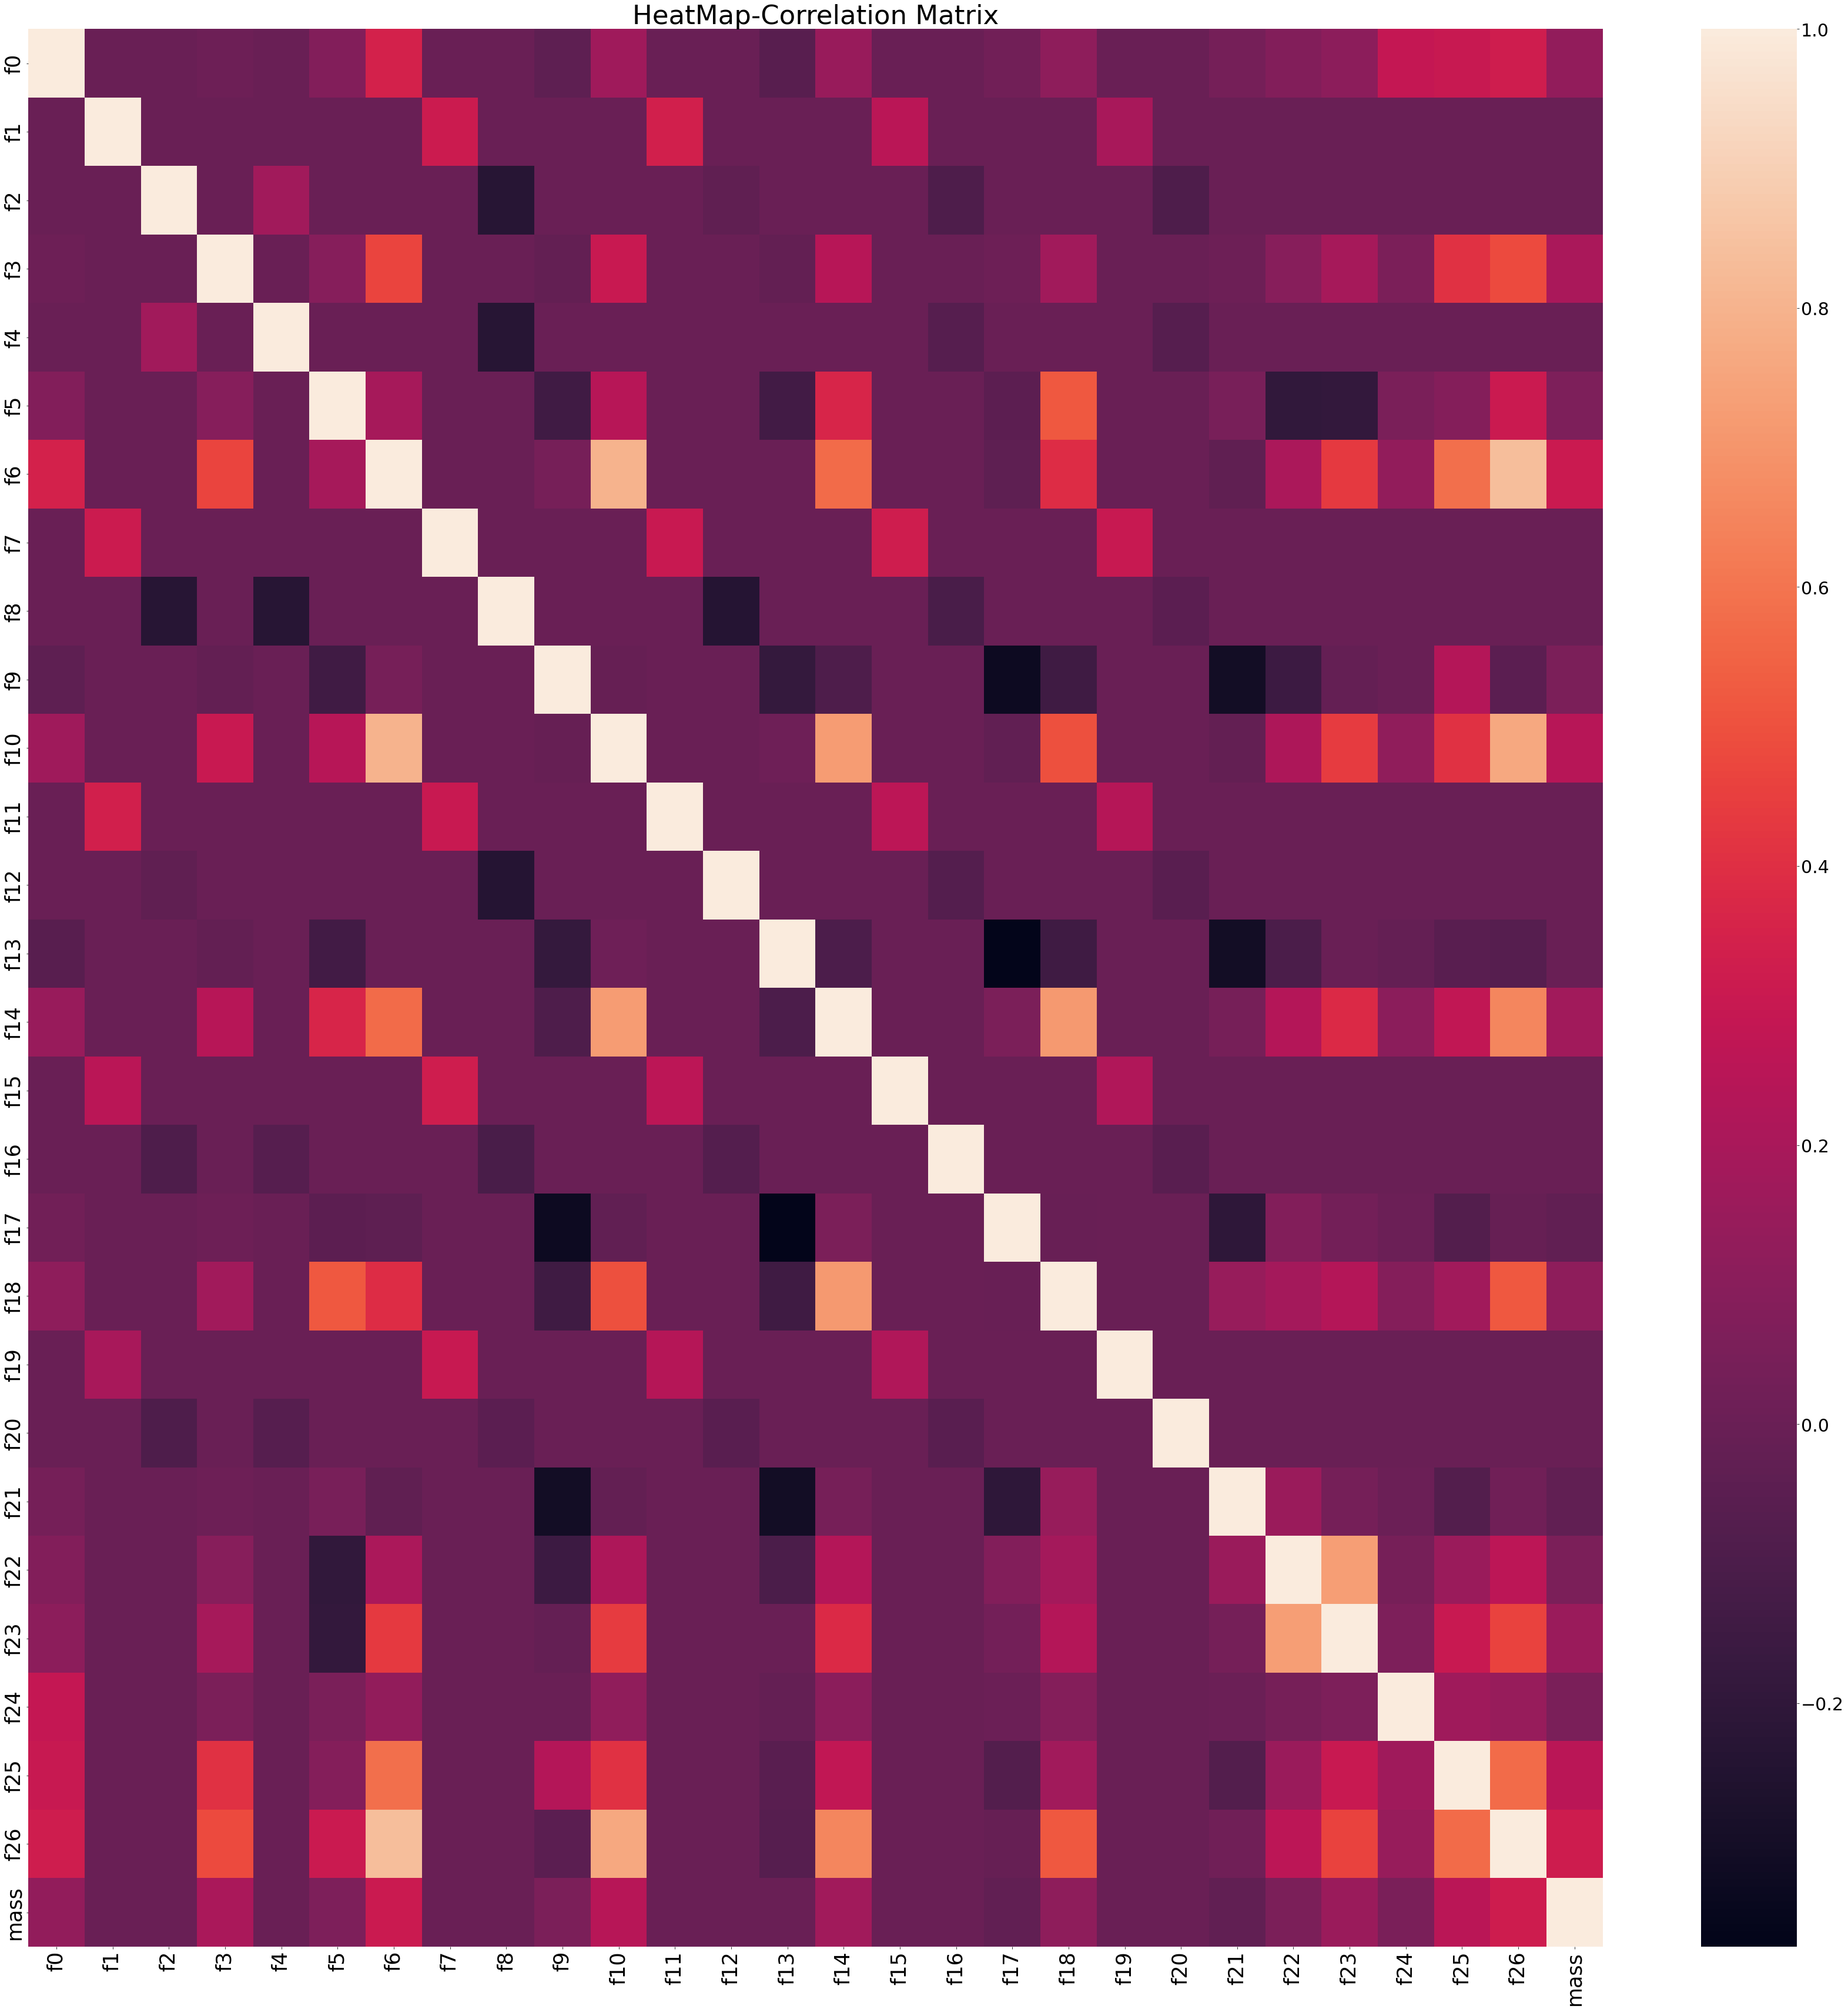

In [13]:
#heatmap - correlation matrix
plt.figure(figsize=(60, 60)) #code reference (5-1)
plt.xticks(rotation=90,fontsize = 35)
plt.yticks(rotation=180, fontsize = 35)
ax=sns.heatmap(df_X.corr(), annot=False, cbar=True, annot_kws={"size":25})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
plt.title('HeatMap-Correlation Matrix',fontsize = 45)
plt.show()

##### Check for Multicolliniarity 

In [14]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
# to drop features with colliniarity more than 95%
pd.set_option('display.max_rows', 100)

corr_df = pd.DataFrame(df_X.corr().abs())
corr_df.head(100)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
f0,1.000000,0.000556,0.000321,0.012037,0.000464,0.078401,0.349973,0.000026,0.000924,0.039924,...,0.119041,0.000152,0.000617,0.034794,0.080169,0.109947,0.289670,0.296976,0.327533,0.126717
f1,0.000556,1.000000,0.000200,0.000706,0.000131,0.000511,0.000454,0.315357,0.000580,0.000141,...,0.000079,0.195312,0.000254,0.000191,0.000100,0.000384,0.000178,0.000563,0.000782,0.000050
f2,0.000321,0.000200,1.000000,0.000074,0.174967,0.000162,0.000436,0.000024,0.232319,0.000426,...,0.000026,0.000399,0.092043,0.000312,0.000171,0.000075,0.000499,0.000186,0.000315,0.000169
f3,0.012037,0.000706,0.000074,1.000000,0.000385,0.092129,0.468157,0.000091,0.000188,0.021872,...,0.174068,0.000328,0.000047,0.010787,0.096627,0.190014,0.056976,0.406295,0.482503,0.203470
f4,0.000464,0.000131,0.174967,0.000385,1.000000,0.000496,0.000307,0.000435,0.233003,0.000084,...,0.000338,0.000400,0.068271,0.000485,0.000136,0.000061,0.000009,0.000346,0.000414,0.000002
f5,0.078401,0.000511,0.000162,0.092129,0.000496,1.000000,0.191900,0.000740,0.000671,0.143509,...,0.517752,0.000337,0.000305,0.044609,0.195117,0.188721,0.050882,0.082941,0.308311,0.064497
f6,0.349973,0.000454,0.000436,0.468157,0.000307,0.191900,1.000000,0.000491,0.000699,0.038961,...,0.390014,0.000226,0.000303,0.034123,0.209496,0.433089,0.126159,0.581645,0.835995,0.310024
f7,0.000026,0.315357,0.000024,0.000091,0.000435,0.000740,0.000491,1.000000,0.000887,0.000328,...,0.000251,0.299012,0.000276,0.000131,0.000023,0.000133,0.000182,0.000020,0.000621,0.000069
f8,0.000924,0.000580,0.232319,0.000188,0.233003,0.000671,0.000699,0.000887,1.000000,0.000548,...,0.000235,0.000124,0.051674,0.000047,0.000099,0.000354,0.000657,0.000375,0.000296,0.000755
f9,0.039924,0.000141,0.000426,0.021872,0.000084,0.143509,0.038961,0.000328,0.000548,1.000000,...,0.146027,0.000023,0.000175,0.307213,0.155551,0.015394,0.000711,0.235398,0.049122,0.055660


In [15]:
# Multi Colliniarity analysis on Independent variables 
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
print(upper_tri)

      f0        f1        f2        f3        f4        f5        f6  \
f0   NaN  0.000556  0.000321  0.012037  0.000464  0.078401  0.349973   
f1   NaN       NaN  0.000200  0.000706  0.000131  0.000511  0.000454   
f2   NaN       NaN       NaN  0.000074  0.174967  0.000162  0.000436   
f3   NaN       NaN       NaN       NaN  0.000385  0.092129  0.468157   
f4   NaN       NaN       NaN       NaN       NaN  0.000496  0.000307   
f5   NaN       NaN       NaN       NaN       NaN       NaN  0.191900   
f6   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f7   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f8   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f9   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f10  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f11  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f12  NaN       NaN       NaN       NaN       NaN       NaN      

In [16]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print((to_drop))

[]


In [17]:
df = pd.get_dummies(df, columns=['f9', 'f13', 'f17', 'f21'], prefix=['f9', 'f13', 'f17', 'f21'])

In [18]:
X = df.drop(['# label'],axis=1)
ind_columns = df.drop('# label',axis=1).columns
y = df['# label']

We did normalize the attributes using StandardScaler() to scale them between 0 and 1 before running models.

In [19]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
#Direct train/test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=1234
)

In [21]:
#Create Cross Validation Procedure
cv = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

#### Neural Network Model

In [22]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
my_model = tf.keras.Model()

In [ ]:
layer_zero = tf.keras.Input(shape=(32,))
layer1 = tf.keras.layers.Dense(512, activation='gelu')(layer_zero)
layer2 = tf.keras.layers.Dense(256, activation='gelu')(layer1)
#layer3 = tf.keras.layers.Dense(128, activation='gelu')(layer2)
layer4 = tf.keras.layers.Dense(2, activation='sigmoid')(layer2)

my_model = tf.keras.Model(inputs=layer_zero, outputs=layer4)

In [ ]:
my_model.compile(optimizer=Adam(lr=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
safety = EarlyStopping(monitor='val_loss', patience=3, min_delta=2e-4)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

In [ ]:
my_model.summary()

In [ ]:
nn_history = my_model.fit(x_train, y_train, 
                 validation_data=(x_val, y_val),
                 callbacks=[safety],
                 epochs=50, batch_size=2048)

#### Model Evaluation

In [ ]:
history_df = pd.DataFrame(nn_history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(nn_history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
y_pred=my_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, np.argmax(y_pred, axis=1)))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    #fmt = '.2f''d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(Y_test, np.argmax(y_pred, axis=1))

cm_plot_label =['No', 'Yes']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix')

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(Y_test, np.argmax(y_pred, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, np.argmax(y_pred, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.close()

In [23]:
pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
You should consider upgrading via the '/Users/ravis/miniforge3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
